## Final Project Submission

Please fill out:
* Student name: Abdulrahman Mawar
* Instructor name: Hardik Idnani
* GitHub URL: https://github.com/amawar/Phase_2.git


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# OBTAIN

In [2]:
#OBTAIN - The data is obtained from KC House Data which can be found in the repository
house = pd.read_csv('data/kc_house_data.csv')

In [3]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
#Selecting the desired columns
house = house[['price', 'bedrooms', 'bathrooms', 'sqft_living',
'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built',]]

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [6]:
house.shape

(21597, 10)

In [7]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [8]:
house['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [9]:
#There are more 0 which is no waterfront than 1 which is waterfront, which means we can change the missing to 0
house['waterfront'] = house['waterfront'].fillna(0)

In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   21597 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


# SCRUB

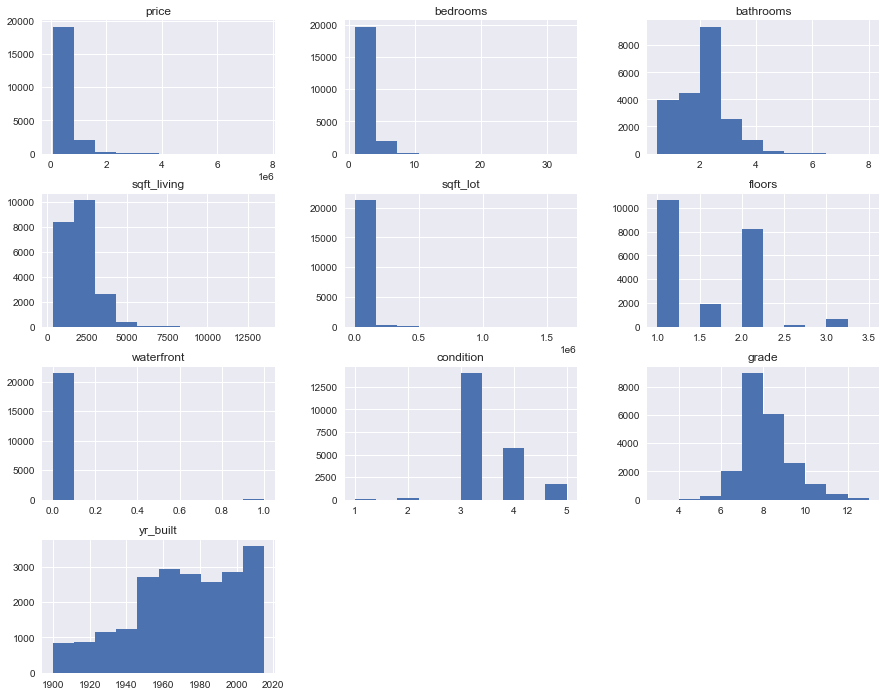

In [11]:
#SCRUB - This section will look into the data, checking for any outliers, missing values, replacing any errors or missing values
#This section will also look into how the data is distributed
house.hist(figsize = (15,12))
plt.show()

In [12]:
#It looks like 'bedrooms' might have an outlier
house['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [13]:
#Check if it was a typo or correct
house[house['bedrooms']== 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15856,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,1947


In [14]:
#Compare the data to other 3 'bedrooms'
house[house['bedrooms']== 3]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
6,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1995
7,291850.0,3,1.50,1060,9711,1.0,0.0,3,7,1963
...,...,...,...,...,...,...,...,...,...,...
21587,507250.0,3,2.50,2270,5536,2.0,0.0,3,8,2003
21588,429000.0,3,2.00,1490,1126,3.0,0.0,3,8,2014
21591,475000.0,3,2.50,1310,1294,2.0,0.0,3,8,2008
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009


In [15]:
#It was probably a typo as the 33 bedrooms other variables are similar to the 3 bedrooms, so we will correct it
house.loc[15856, 'bedrooms'] = 3

In [16]:
house['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

# EXPLORE

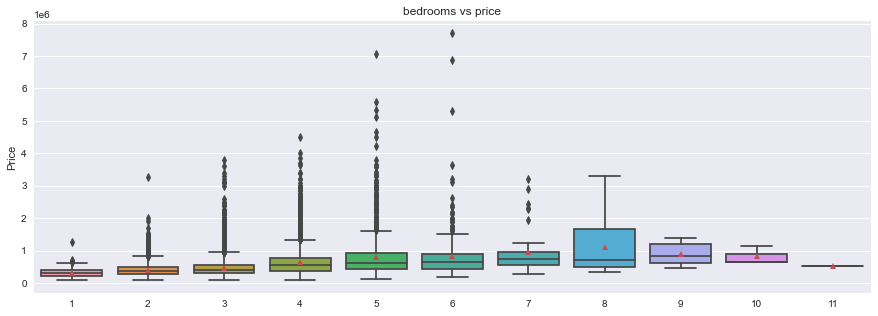

In [17]:
#EXPLORE - This section will explore the individual predictors vs the dependent variable 'price'
#Bedrooms
plt.figure(figsize=(15,5))
sns.boxplot(x = house['bedrooms'], y = house['price'], showmeans=True)
plt.title("bedrooms vs price")
plt.ylabel("Price")
plt.xlabel(None)
plt.show()

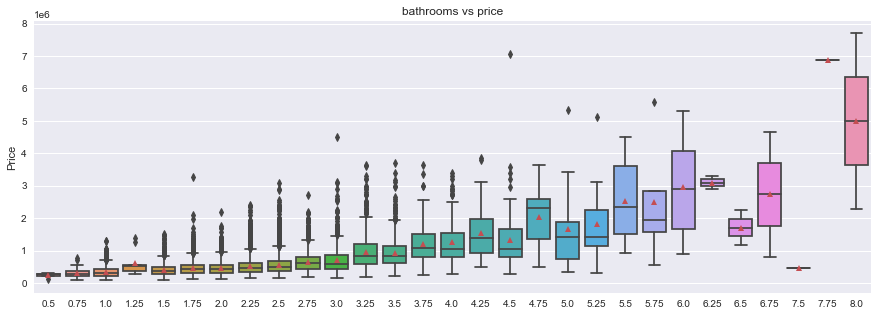

In [18]:
#Bathrooms
plt.figure(figsize=(15,5))
sns.boxplot(x = house['bathrooms'], y = house['price'], showmeans=True)
plt.title("bathrooms vs price")
plt.ylabel("Price")
plt.xlabel(None)
plt.show()

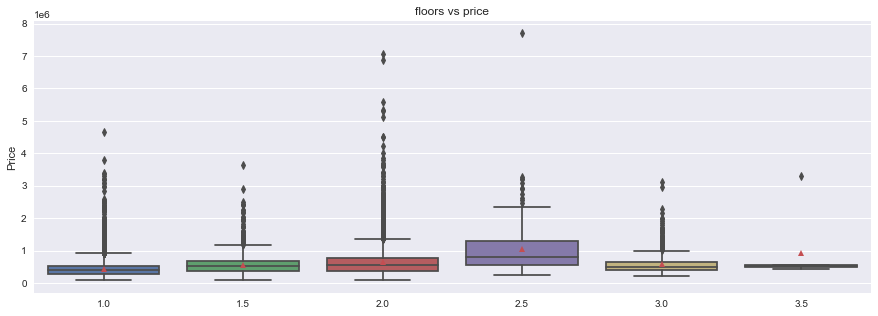

In [19]:
#Floors
plt.figure(figsize=(15,5))
sns.boxplot(x = house['floors'], y = house['price'], showmeans=True)
plt.title("floors vs price")
plt.ylabel("Price")
plt.xlabel(None)
plt.show()

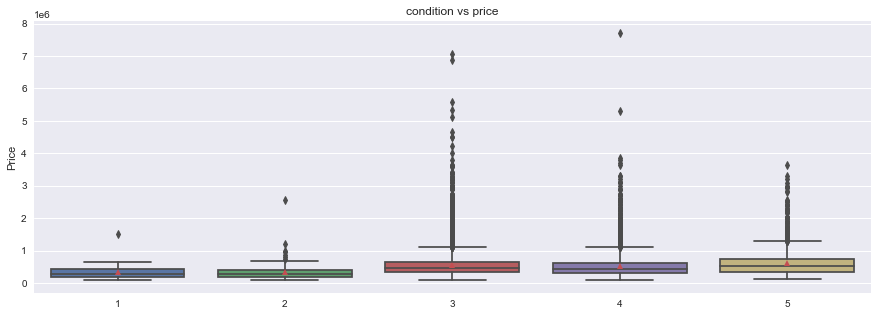

In [20]:
#Condition
plt.figure(figsize=(15,5))
sns.boxplot(x = house['condition'], y = house['price'], showmeans=True)
plt.title("condition vs price")
plt.ylabel("Price")
plt.xlabel(None)
plt.show()

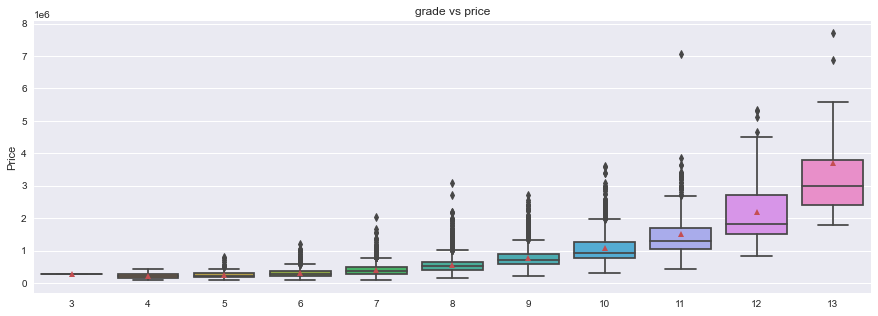

In [21]:
#Grade
plt.figure(figsize=(15,5))
sns.boxplot(x = house['grade'], y = house['price'], showmeans=True)
plt.title("grade vs price")
plt.ylabel("Price")
plt.xlabel(None)
plt.show()

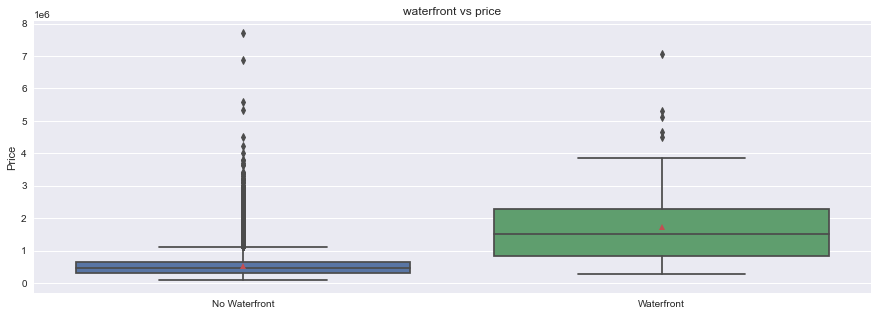

In [22]:
#Waterfront
plt.figure(figsize=(15,5))
sns.boxplot(x = house['waterfront'], y = house['price'], showmeans=True)
plt.title("waterfront vs price")
plt.ylabel("Price")
plt.xlabel(None)
plt.xticks(np.arange(2), ('No Waterfront', 'Waterfront'))
plt.show()

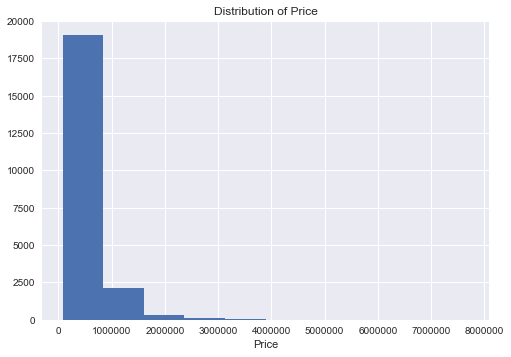

In [23]:
house['price'].hist()
plt.xlabel('Price')
plt.title('Distribution of Price')
plt.ticklabel_format(style='plain')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

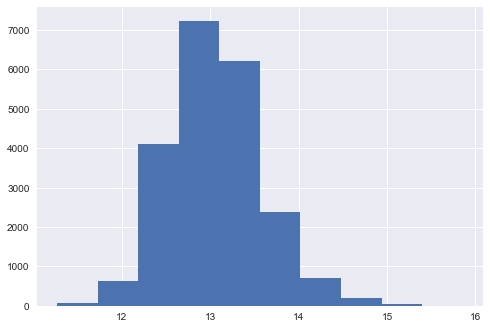

In [24]:
#Let's log the dependent variable, it's very skewed to the left
p_log = np.log(house['price'])
plt.hist(p_log)
plt.show

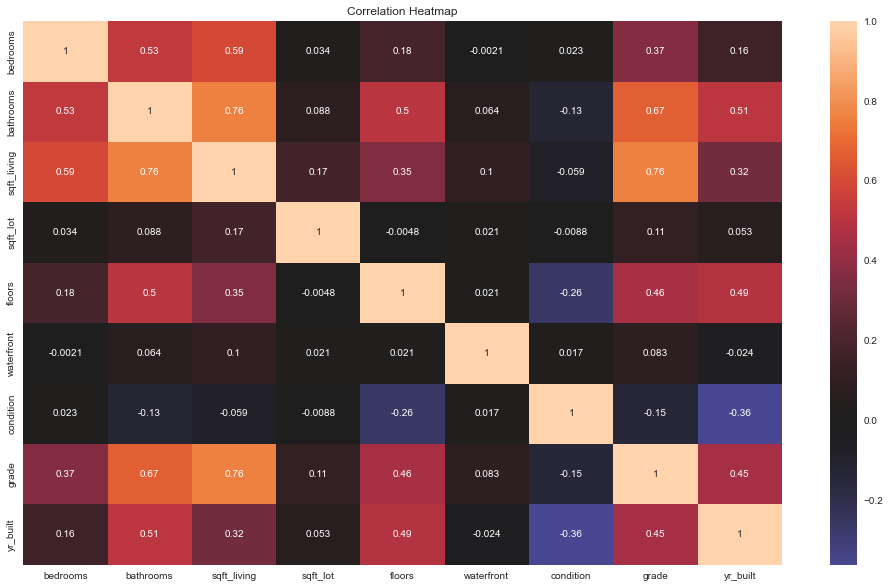

In [25]:
#Looking at correlation between the predictors

x = house.drop('price', axis=1)
y = house['price']

corr = x.corr()

plt.figure(figsize = (17,10))
sns.heatmap(corr, center = 0, annot = True)
plt.title('Correlation Heatmap')
plt.show()

There is a moderate correlation between bedrooms and sqft_living, sqft_living and grade. In the regression will probably omit sqft_living due to high correlation with other predictors.

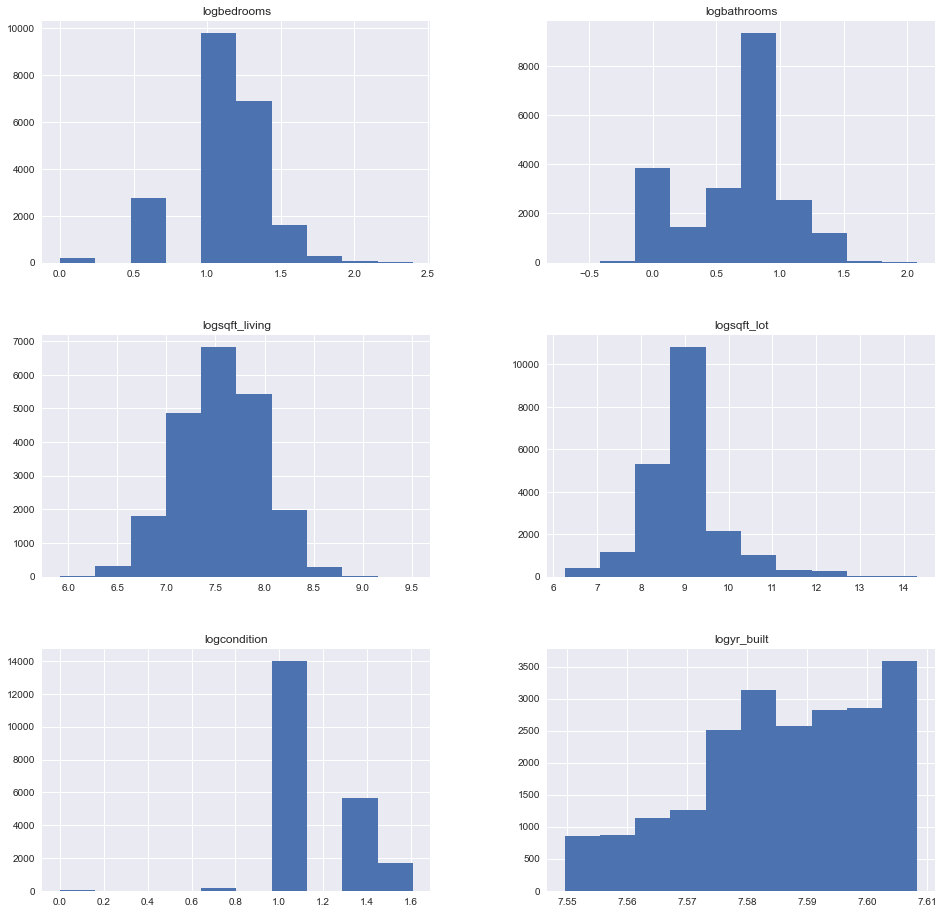

In [26]:
#This section will log the skewed data
house_pred = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']]

data_log = pd.DataFrame([])
data_log['logbedrooms'] = np.log(house_pred['bedrooms'])
data_log['logbathrooms'] = np.log(house_pred['bathrooms'])
data_log['logsqft_living'] = np.log(house_pred['sqft_living'])
data_log['logsqft_lot'] = np.log(house_pred['sqft_lot'])
data_log['logcondition'] = np.log(house_pred['condition'])
data_log['logyr_built'] = np.log(house_pred['yr_built'])

data_log.hist(figsize  = [16, 16]);

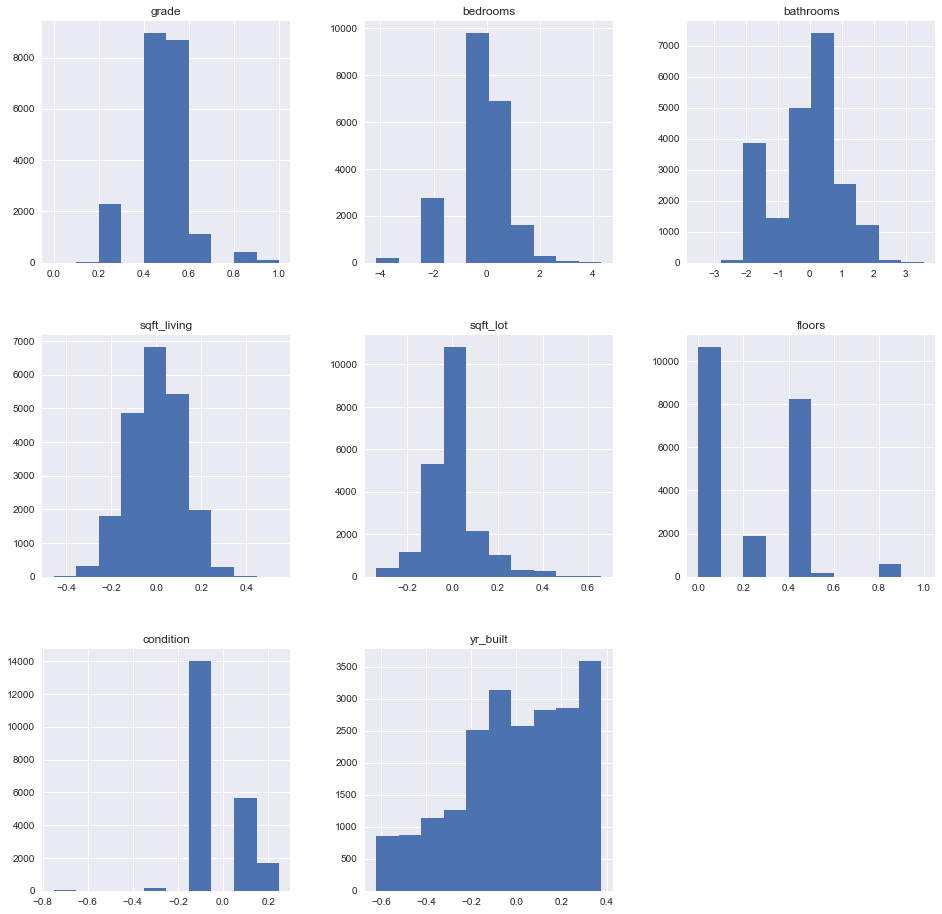

In [27]:
#This section will scale the data
grade = house['grade']
floors = house['floors']
logbedrooms = data_log['logbedrooms']
logbathrooms = data_log['logbathrooms']
logsqft_living = data_log['logsqft_living']
logsqft_lot = data_log['logsqft_lot']
logcondition = data_log['logcondition']
logyr_built = data_log['logyr_built']

scaled_grade = (grade - min(grade)) / (max(grade) - min(grade))
scaled_floors = (floors - min(floors)) / (max(floors) - min(floors))
scaled_bedrooms = (logbedrooms - np.mean(logbedrooms)) / np.sqrt(np.var(logbedrooms))
scaled_bathrooms = (logbathrooms - np.mean(logbathrooms)) / np.sqrt(np.var(logbathrooms))
scaled_sqft_living = (logsqft_living - np.mean(logsqft_living)) / (max(logsqft_living) - min(logsqft_living))
scaled_sqft_lot = (logsqft_lot - np.mean(logsqft_lot)) / (max(logsqft_lot) - min(logsqft_lot))
scaled_condition = (logcondition - np.mean(logcondition)) / (max(logcondition) - min(logcondition))
scaled_yr_built = (logyr_built - np.mean(logyr_built)) / (max(logyr_built) - min(logyr_built))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['grade'] = scaled_grade
data_cont_scaled['bedrooms'] = scaled_bedrooms
data_cont_scaled['bathrooms'] = scaled_bathrooms
data_cont_scaled['sqft_living'] = scaled_sqft_living
data_cont_scaled['sqft_lot'] = scaled_sqft_lot
data_cont_scaled['floors'] = scaled_floors
data_cont_scaled['condition'] = scaled_condition
data_cont_scaled['yr_built'] = scaled_yr_built

data_cont_scaled.hist(figsize = [16, 16]);

In [28]:
#Final Data
house_fin = pd.DataFrame([])
house_fin['grade'] = scaled_grade
house_fin['bedrooms'] = scaled_bedrooms
house_fin['bathrooms'] = scaled_bathrooms
house_fin['sqft_living'] = scaled_sqft_living
house_fin['sqft_lot'] = scaled_sqft_lot
house_fin['floors'] = scaled_floors
house_fin['condition'] = scaled_condition
house_fin['yr_built'] = scaled_yr_built
house_fin['waterfront'] = house['waterfront']
price = np.log(house['price'])

house_fin = pd.concat([price, house_fin], axis=1)

In [29]:
house_fin.head()

,price,grade,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,yr_built,waterfront
0,12.309982,0.4,-0.279767,-1.726549,-0.132629,-0.043456,0.0,-0.069084,-0.136800,0.0
1,13.195614,0.4,-0.279767,0.339661,0.083597,-0.012669,0.4,-0.069084,-0.171652,0.0
2,12.100712,0.3,-1.713918,-1.726549,-0.251210,0.027351,0.0,-0.069084,-0.329379,0.0
3,13.311329,0.4,0.737780,1.072660,0.008328,-0.058613,0.0,0.248310,-0.049979,0.0
4,13.142166,0.5,-0.279767,0.039555,-0.034493,0.000911,0.0,-0.069084,0.139482,0.0


In [30]:
house.shape

(21597, 10)

# MODEL

In [31]:
#Model 1 with all predictors
outcome = 'price'
predictors = house_fin.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=house_fin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     4376.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:48:14   Log-Likelihood:                -5579.8
No. Observations:               21597   AIC:                         1.118e+04
Df Residuals:                   21587   BIC:                         1.126e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.9142      0.014    865.740      0.000      11.887      11.941
grade           2.3751      0.030     80.115      0.000       2.317       2.433
bedrooms       -0.0473      0.003    -16.301      0.000      -0.053      -0.042
bathrooms       0.0480      0.004     12.470      0.000       0.040       0.056
sqft_living     1.7284      0.040     43.348      0.000       1.650       1.807
sqft_lot       -0.3521      0.022    -15.702      0.000      -0.396      -0.308
floors          0.1213      0.013      9.215      0.000       0.095       0.147
condition       0.2179      0.020     10.633      0.000       0.178       0.258
yr_built       -0.6826      0.011    -61.501      0.000      -0.704      -0.661
waterfront      0.5589      0.026     21.262      0.000       0.507       0.610
==============================================================================
Omnibus:                       75.074   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.318
Skew:                          -0.028   Prob(JB):                     2.71e-22
Kurtosis:                       3.328   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Model 2 withour sqft_living, which had moderate correlation with other predictors
house_fin2 = house_fin[['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built', 'waterfront']]
outcome = 'price'
predictors = house_fin2.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=house_fin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     4313.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:48:44   Log-Likelihood:                -6481.0
No. Observations:               21597   AIC:                         1.298e+04
Df Residuals:                   21588   BIC:                         1.305e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5966      0.012    954.796      0.000      11.573      11.620
bedrooms       0.0086      0.003      3.193      0.001       0.003       0.014
bathrooms      0.1263      0.004     35.637      0.000       0.119       0.133
sqft_lot      -0.0337      0.022     -1.527      0.127      -0.077       0.010
floors         0.1540      0.014     11.241      0.000       0.127       0.181
condition      0.2280      0.021     10.673      0.000       0.186       0.270
grade          3.0425      0.026    115.186      0.000       2.991       3.094
yr_built      -0.7587      0.011    -66.395      0.000      -0.781      -0.736
waterfront     0.5973      0.027     21.806      0.000       0.544       0.651
==============================================================================
Omnibus:                       82.712   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.931
Skew:                           0.002   Prob(JB):                     3.00e-25
Kurtosis:                       3.354   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#model 3 without sqft_lot due to P value greater than 0.05
house_fin3 = house_fin[['price', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'yr_built', 'waterfront']]
outcome = 'price'
predictors = house_fin3.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=house_fin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     4928.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:43:46   Log-Likelihood:                -6482.2
No. Observations:               21597   AIC:                         1.298e+04
Df Residuals:                   21589   BIC:                         1.304e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5996      0.012    967.983      0.000      11.576      11.623
bedrooms       0.0080      0.003      3.004      0.003       0.003       0.013
bathrooms      0.1264      0.004     35.642      0.000       0.119       0.133
floors         0.1614      0.013     12.583      0.000       0.136       0.186
condition      0.2276      0.021     10.653      0.000       0.186       0.269
grade          3.0329      0.026    118.203      0.000       2.983       3.083
yr_built      -0.7593      0.011    -66.501      0.000      -0.782      -0.737
waterfront     0.5946      0.027     21.752      0.000       0.541       0.648
==============================================================================
Omnibus:                       80.128   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.823
Skew:                          -0.001   Prob(JB):                     2.34e-24
Kurtosis:                       3.348   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# INTERPRET

Final model, model 3 above has the following regression interpretation
 - Price is the dependent variable
 - 6 Predictors
 - 60.7% of variations explained in our model
 - Bedrooms has a P-Value greater than 0.05
 - yr_build has a negative coef